#### THis is just a concept on how the random forest actually works. Internal executation of random forest

In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.518249,1.099096,0.729363,1.457944,-3.115671,0
1,-0.283912,-1.114821,-1.959751,-0.936978,2.574862,1
2,-0.815788,-1.053746,-1.144587,-0.900860,2.557582,1
3,1.728207,1.410086,-0.285133,-0.703773,-4.043267,0
4,0.386491,-2.792376,-4.875981,0.289964,5.614687,1


In [4]:
# Function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [29]:
# Function for Column/Feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# Function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)


In [7]:
# Now I will give datasets to the 3 base Decision tress models using row sampling
# This is with replacement
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

In [8]:
# Everyone will have the same shape
print(df.shape) # actual data
print(df1.shape) # random 10% data 
print(df2.shape) # random 10% data
print(df3.shape) # random 10% data

(100, 6)
(10, 6)
(10, 6)
(10, 6)


In [9]:
# Now I will make 3 Decision tress models like base models inside the random orest
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [10]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[4] <= 0.092\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

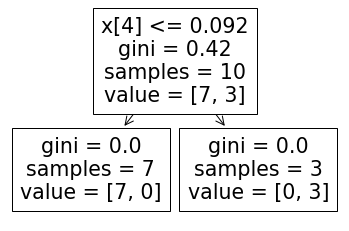

In [11]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.638\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.5, 'x[4] <= 0.558\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

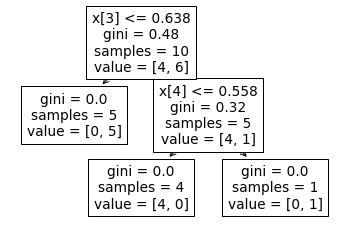

In [12]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[2] <= 0.235\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

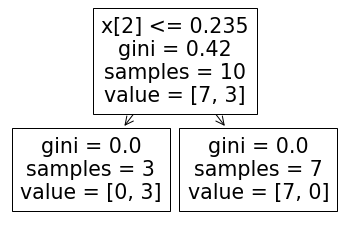

In [13]:
plot_tree(clf3)

In [22]:
# Predicting a datapoint
clf1.predict(np.array([-0.283912,-1.114821,-1.959751,-0.936978,2.574862]).reshape(1,5))
# First classifier predicts its 1

array([1])

In [23]:
clf2.predict(np.array([-0.283912,-1.114821,-1.959751,-0.936978,2.574862]).reshape(1,5))
# Second classifier predicts its 1

array([1])

In [24]:
clf3.predict(np.array([-0.283912,-1.114821,-1.959751,-0.936978,2.574862]).reshape(1,5))
# Third classifier predicts its 1

array([1])

### Since all the classifier says label 0 the final output will be 0  

In [31]:
## Coolumn Sampling
df1 = sample_features(df, 0.8)
df2 = sample_features(df, 0.8)
df3 = sample_features(df, 0.8)

In [32]:
df1

,col4,col2,col1,col5,target
0,1.457944,1.099096,3.518249,-3.115671,0
1,-0.936978,-1.114821,-0.283912,2.574862,1
2,-0.900860,-1.053746,-0.815788,2.557582,1
3,-0.703773,1.410086,1.728207,-4.043267,0
4,0.289964,-2.792376,0.386491,5.614687,1
...,...,...,...,...,...
95,-3.394831,0.791262,-2.570517,-0.759417,1
96,-1.185841,0.598286,1.673192,0.945719,1
97,-0.811685,-1.294054,-2.660347,-0.343144,1
98,2.058332,-0.162749,2.242597,-1.529227,0


In [33]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [37]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:,-1])
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:,-1])
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.9285714285714286, 'x[0] <= 0.604\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[3] <= -0.781\ngini = 0.367\nsamples = 62\nvalue = [15, 47]'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[2] <= -0.764\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2, 0.5, 'x[2] <= 1.961\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.13333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.26666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5333333333333333, 0.6428571428571429, 'x[3] <= 0.149\ngini = 0.127\nsamples = 44\nvalue = [3, 41]'),
 Text(0.4666666666666667, 0.5, 'x[0] <= -0.612\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5333333333333333, 0.35714285714285715, 'x[1] <= -2.091\

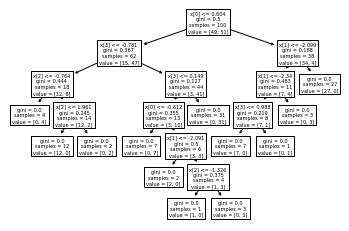

In [38]:
plot_tree(clf1)

[Text(0.32894736842105265, 0.9166666666666666, 'x[3] <= 0.001\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.10526315789473684, 0.75, 'x[0] <= -2.633\ngini = 0.142\nsamples = 39\nvalue = [3, 36]'),
 Text(0.05263157894736842, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.15789473684210525, 0.5833333333333334, 'x[2] <= 0.621\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(0.10526315789473684, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.21052631578947367, 0.4166666666666667, 'x[3] <= -0.463\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5526315789473685, 0.75, 'x[1] <= -0.733\ngini = 0.371\nsamples = 61\nvalue = [46, 15]'),
 Text(0.3684210526315789, 0.5833333333333334, 'x[2] <= -0.417\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.3157894736842105, 0.41

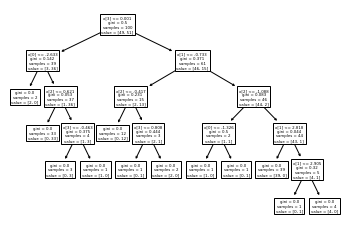

In [39]:
plot_tree(clf2)

[Text(0.6, 0.9285714285714286, 'x[0] <= 0.604\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[1] <= -0.781\ngini = 0.367\nsamples = 62\nvalue = [15, 47]'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[3] <= -0.764\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2, 0.5, 'x[3] <= 1.961\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.13333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.26666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5333333333333333, 0.6428571428571429, 'x[1] <= 0.149\ngini = 0.127\nsamples = 44\nvalue = [3, 41]'),
 Text(0.4666666666666667, 0.5, 'x[0] <= -0.612\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5333333333333333, 0.35714285714285715, 'x[2] <= -2.091\

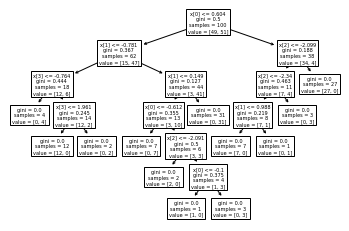

In [40]:
plot_tree(clf3)

In [41]:
# Combined sampling
df1 = combined_sampling(df, 0.5, 0.5)
df2 = combined_sampling(df, 0.5, 0.5)
df3 = combined_sampling(df, 0.5, 0.5)

In [47]:
print(df.shape) # actual data
print(df1.shape) 
print(df2.shape) 
print(df3.shape) 

(100, 6)
(50, 3)
(50, 3)
(50, 3)


In [42]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [43]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]')]

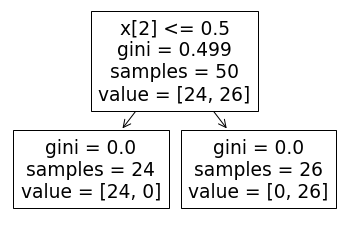

In [44]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

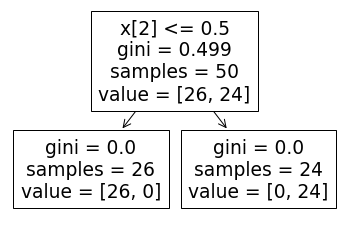

In [45]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]')]

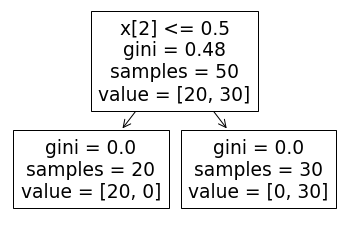

In [46]:
plot_tree(clf3)